In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchvision import datasets,transforms

In [2]:
import torch.nn.functional as F

In [3]:
import os
from PIL import Image
from IPython.display import display

In [4]:
import warnings
warnings.filterwarnings('ignore')

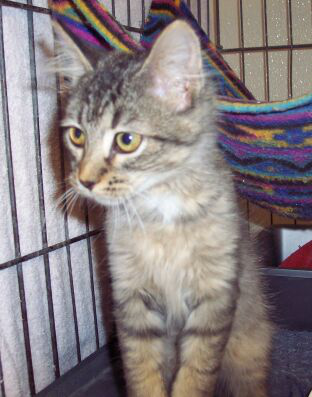

In [5]:
with Image.open('CATS_DOGS/train/CAT/2.jpg') as j:
    display(j)

In [6]:
image_name=[]
i=0
for folder,dire,filename in os.walk('CATS_DOGS\\'):
    for img in filename:
        image_name.append(os.path.join(folder,img))
        

In [7]:
image_name
len(image_name)

24994

In [8]:
img_szs=[]
rejected=[]

In [9]:
for item in image_name:
    try:
        with Image.open(item) as j:
            img_szs.append(j.size)
    except:
        rejected.append(j)

In [10]:
len(img_szs)

24994

In [11]:
df1=pd.DataFrame(img_szs)

In [12]:
df1

,0,1
0,431,360
1,500,375
2,500,471
3,500,375
4,320,240
...,...,...
24989,500,375
24990,350,262
24991,250,181
24992,494,500


In [13]:
df1[0].describe()

count    24994.000000
mean       404.493518
std        108.941802
min         42.000000
25%        323.000000
50%        448.000000
75%        500.000000
max        500.000000
Name: 0, dtype: float64

In [14]:
train_transforms=transforms.Compose([transforms.RandomRotation(10),
                              transforms.RandomHorizontalFlip(),
                              transforms.Resize(224),
                              transforms.CenterCrop(224),
                              transforms.ToTensor(),
                              transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])])

In [15]:
test_transforms=transforms.Compose([transforms.Resize(224),
                              transforms.CenterCrop(224),
                              transforms.ToTensor(),
                              transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])])

In [17]:
train_data=datasets.ImageFolder('CATS_DOGS/train/',transform=train_transforms)

In [18]:
test_data=datasets.ImageFolder('CATS_DOGS/test/',transform=test_transforms)

In [19]:
test_data

Dataset ImageFolder
    Number of datapoints: 6251
    Root location: CATS_DOGS/test/
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [22]:
from torch.utils.data import DataLoader

In [23]:
train_loader=DataLoader(train_data,batch_size=10,shuffle=True)

In [24]:
test_loader=DataLoader(test_data,batch_size=10,shuffle=False)

In [29]:
train_data

Dataset ImageFolder
    Number of datapoints: 18743
    Root location: CATS_DOGS/train/
    StandardTransform
Transform: Compose(
               RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
               RandomHorizontalFlip(p=0.5)
               Resize(size=224, interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [31]:
class_names=train_data.classes

In [32]:
for image,label in train_loader:
    break

In [33]:
image

tensor([[[[-2.1179, -2.1179, -0.7993,  ...,  1.9235,  1.9064,  1.8550],
          [-2.1179, -2.1179, -0.7993,  ...,  1.8893,  1.8893,  1.8550],
          [-2.1179, -2.1179, -0.7993,  ...,  1.8722,  1.8722,  1.8722],
          ...,
          [ 0.0056, -0.0116, -0.0458,  ..., -2.0323, -2.1179, -2.1179],
          [-0.0458, -0.0629, -0.0629,  ..., -2.0323, -2.1179, -2.1179],
          [-0.0801, -0.0458, -0.0287,  ..., -1.9809, -2.1179, -2.1179]],

         [[-2.0357, -2.0357, -0.6877,  ...,  2.0959,  2.0784,  2.0434],
          [-2.0357, -2.0357, -0.6702,  ...,  2.0609,  2.0609,  2.0434],
          [-2.0357, -2.0357, -0.6702,  ...,  2.0434,  2.0434,  2.0434],
          ...,
          [ 0.1527,  0.1352,  0.0826,  ..., -1.9307, -2.0357, -2.0357],
          [ 0.1001,  0.0826,  0.0651,  ..., -1.9307, -2.0357, -2.0357],
          [ 0.0476,  0.0826,  0.0826,  ..., -1.8957, -2.0357, -2.0357]],

         [[-1.8044, -1.8044, -0.4450,  ...,  2.3437,  2.3263,  2.2914],
          [-1.8044, -1.8044, -

In [34]:
image.shape

torch.Size([10, 3, 224, 224])

In [42]:
from torchvision.utils import make_grid

In [43]:
im=make_grid(image,nrow=5)

In [44]:
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [45]:
inv_transforms=transforms.Normalize([-0.485/0.229,-0.456/0.224,-0.406/0.225],[1/0.229,1/0.224,1/0.225])

In [46]:
inv_m=inv_transforms(im)

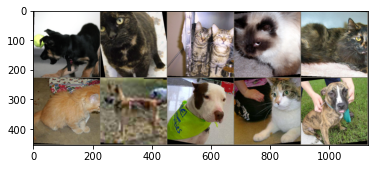

In [47]:
plt.imshow(np.transpose(inv_m,(1,2,0)))

In [48]:
class Convultutional_network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(3,6,3,1)
        self.conv2=nn.Conv2d(6,16,3,1)
        self.fc1=nn.Linear(54*54*16,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,2)
        
    def forward(self,X):
        X=F.relu(self.conv1(X))
        X=F.max_pool2d(X,2,2)
        X=F.relu(self.conv2(X))
        X=F.max_pool2d(X,2,2)
        X=X.view(-1,16*54*54)
        X=F.relu(self.fc1(X))
        X=F.relu(self.fc2(X))
        X=self.fc3(X)
        
        return F.log_softmax(X,dim=1)

In [49]:
model=Convultutional_network()

In [50]:
model

Convultutional_network(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=46656, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)

In [51]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [ ]:
epochs=10
train_losses=[]
predictedp=[]

for i in range(epochs):
    batch_corr=0
    for b,(X_train,y_train) in enumerate(train_loader):
        y_val=model(X_train)
        loss=criterion(y_val,y_train)
        predicted=torch.max(y_val.data,1)[1]
        batch_corr=(predicted==y_train).sum()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    train_losses.append(loss)
    predictedp.append(predicted)

In [ ]:
test_loader_all=DataLoader(test_data,batch_size=10000,shuffle=False)
with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_loader_all):
        io=model(X_test)
        lossees=criterion(io,y_test)